# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=123)

In [10]:
(app_train['DAYS_BIRTH']/365).value_counts()

37.668493    43
36.934247    42
49.994521    41
27.452055    41
28.197260    40
             ..
68.416438     1
68.942466     1
21.408219     1
68.808219     1
68.580822     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [12]:
(app_train['DAYS_BIRTH']/365).round(decimals=0)

0         26.0
1         46.0
2         52.0
3         52.0
4         55.0
          ... 
307506    26.0
307507    57.0
307508    41.0
307509    33.0
307510    46.0
Name: DAYS_BIRTH, Length: 307511, dtype: float64

In [14]:
app_train['AGES'] = (app_train['DAYS_BIRTH']/365).round(decimals=0)
app_train['AGES'].value_counts()

39.0    9023
38.0    8793
37.0    8727
40.0    8602
41.0    8495
28.0    8467
32.0    8313
42.0    8308
43.0    8265
36.0    8152
44.0    8132
31.0    8021
30.0    7776
35.0    7751
33.0    7729
34.0    7659
29.0    7636
54.0    7489
45.0    7385
46.0    7333
47.0    7202
55.0    7140
53.0    7124
57.0    6926
48.0    6907
49.0    6786
52.0    6740
50.0    6696
56.0    6657
60.0    6612
59.0    6479
51.0    6417
27.0    6413
58.0    6371
61.0    5795
63.0    5467
62.0    5362
64.0    5023
26.0    4364
65.0    4318
25.0    4079
24.0    3815
23.0    3669
66.0    2641
22.0    1990
67.0    1834
68.0    1654
21.0     660
69.0     314
Name: AGES, dtype: int64

In [15]:
correlations = app_train.corr()['TARGET'].sort_values()

# 顯示相關係數最大 / 最小的各15個欄位名稱
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
AGES                         -0.078263
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768


In [16]:
# 新增欄位 "equal_width_age", 對年齡做等寬劃分
app_train["EQUAL_WIDTH_AGE"] = pd.cut(app_train["AGES"], 4)
app_train["EQUAL_WIDTH_AGE"].value_counts()

(33.0, 45.0]      99292
(45.0, 57.0]      83417
(20.952, 33.0]    72932
(57.0, 69.0]      51870
Name: EQUAL_WIDTH_AGE, dtype: int64

In [18]:
app_train["EQUAL_FREQ_AGE"] = pd.qcut(app_train["AGES"], 4)
app_train["EQUAL_FREQ_AGE"].value_counts()

(20.999, 34.0]    80591
(43.0, 54.0]      78211
(34.0, 43.0]      76116
(54.0, 69.0]      72593
Name: EQUAL_FREQ_AGE, dtype: int64

In [20]:
app_train["CUSTOMIZE_AGE_GRP"] = pd.cut(app_train["AGES"], [20, 30, 40, 50, 60, 100])

In [21]:
app_train["CUSTOMIZE_AGE_GRP"].value_counts()

(30, 40]     82770
(40, 50]     75509
(50, 60]     67955
(20, 30]     48869
(60, 100]    32408
Name: CUSTOMIZE_AGE_GRP, dtype: int64

In [24]:
age_groups  = app_train.groupby('CUSTOMIZE_AGE_GRP').mean()
age_groups

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,AGES
CUSTOMIZE_AGE_GRP,,,,,,,,,,,,,,,,,,,,,
"(20, 30]",277539.377376,0.114449,0.144202,0.368823,0.610366,0.464794,160446.651771,486690.988172,24899.844585,438606.606266,...,0.000757,0.001842,0.007683,0.007607,0.033812,0.216506,0.259579,1.733069,0.003192,26.887741
"(30, 40]",278195.214148,0.094346,0.097257,0.406850,0.649100,0.831702,179223.568156,604963.533055,27921.331871,543893.587539,...,0.000580,0.000109,0.006131,0.007327,0.034298,0.282140,0.259087,1.811338,0.006379,35.615525
"(40, 50]",278334.021282,0.075819,0.092214,0.373598,0.717623,0.419301,180522.638867,659248.374710,28869.708013,591050.399968,...,0.000636,0.000040,0.006515,0.006230,0.033751,0.301082,0.258724,1.883173,0.026619,45.258459
"(50, 60]",278755.450548,0.060363,0.080156,0.276713,0.745994,0.067692,163957.959524,645129.271172,27445.577281,580231.743275,...,0.000309,0.000015,0.005973,0.007133,0.035398,0.280410,0.271409,2.001548,0.374483,55.455787
"(60, 100]",277546.577543,0.049247,0.054678,0.181252,0.767619,0.013361,137594.659391,516267.758424,23553.507514,464296.731710,...,0.000062,0.000000,0.005954,0.006846,0.034549,0.193069,0.293721,2.188327,0.840286,63.682548


In [25]:
age_groups['TARGET']

CUSTOMIZE_AGE_GRP
(20, 30]     0.114449
(30, 40]     0.094346
(40, 50]     0.075819
(50, 60]     0.060363
(60, 100]    0.049247
Name: TARGET, dtype: float64

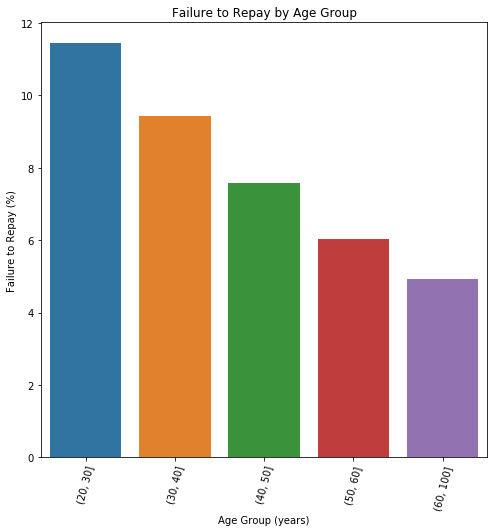

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = age_groups.index.astype(str)
py = 100 * age_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

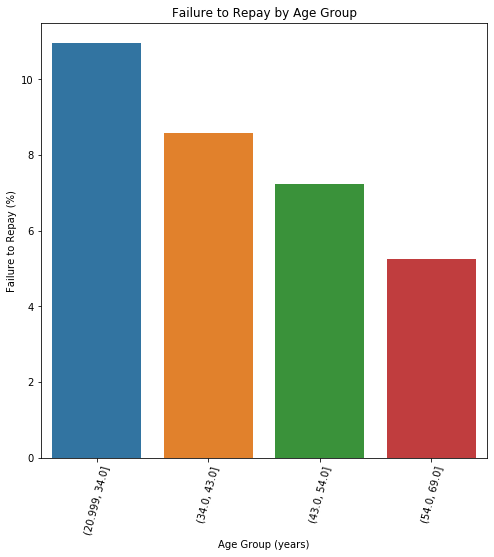

In [29]:
age_groups_2  = app_train.groupby('EQUAL_FREQ_AGE').mean()

plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = age_groups_2.index.astype(str)
py = 100 * age_groups_2['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

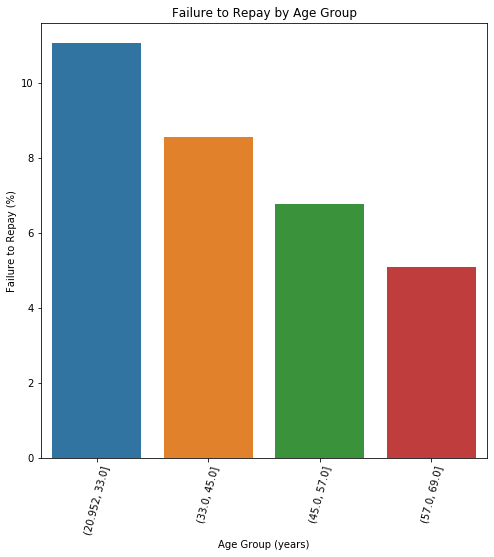

In [30]:

age_groups_3  = app_train.groupby('EQUAL_WIDTH_AGE').mean()

plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = age_groups_3.index.astype(str)
py = 100 * age_groups_3['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');